In [1]:
import nltk

In [2]:
##nltk.download()

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('dataset/Restaurant_Reviews.tsv',delimiter='\t')

In [5]:
data.head(5)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
data.shape

(1000, 2)

In [7]:
data.Liked.value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [8]:
data.Review[0]

'Wow... Loved this place.'

In [9]:
a='hello hi...? how r u\...@'

In [10]:
#hello hi how r u
import string

In [11]:
d=string.punctuation

In [12]:
def check(a):
    b=[]
    for i in a:
        if i not in d:
            b.append(i.lower())

    print (''.join(b))

In [13]:
check(data.Review[0])

wow loved this place


In [ ]:
#data[data.Review.str.contains('@')]

In [ ]:
#cleaning the punctuation marks

In [14]:
import re

In [15]:
data.Review[0]

'Wow... Loved this place.'

In [16]:
review = re.sub('[^a-zA-Z]',' ',data.Review[0])

In [17]:
review

'Wow    Loved this place '

In [ ]:
#convert all letters into small

In [ ]:
#remove words that are not much usefull(a,the,this,that...etc)

In [18]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [19]:
from nltk.corpus import stopwords

In [20]:
stop=stopwords.words('english')

In [21]:
#w=['wow','hey','here','ohh','ok']

In [22]:
#t=stop

In [23]:
rev = review.split()

In [24]:
rev

['Wow', 'Loved', 'this', 'place']

In [25]:
rev = [word.lower() for word in rev if not word in stop]

In [26]:
rev

['wow', 'loved', 'place']

In [27]:
##Stemming is about taking root of the words

In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
ps= PorterStemmer()

In [ ]:
#word_list={'play':['play','playing','played']}

In [ ]:
w=['playing','played','waiting']

In [ ]:
for i in w:
    print ps.stem(i)

In [ ]:
rev = [ps.stem(word) for word in rev if not word in stopwords.words('english')]

In [ ]:
print rev

In [28]:
stop = stopwords.words('english')

In [29]:
s= list(stop)

In [30]:
s.remove('not')

In [31]:
'not' in s

False

In [32]:
def clean_text(t):
    review = re.sub('[^a-zA-Z]',' ',t)
    rev= review.lower()
    rev = rev.split()
   # print (rev)
    rev = [word for word in rev if not word in s]
    return ' '.join(rev)

In [33]:
clean_text('this is my not review..?hello playing  hi..@$')

'not review hello playing hi'

In [34]:
#data.Review.apply(clean_text)

In [35]:
data['Review']=data.Review.apply(clean_text)

In [36]:
data.head()

,Review,Liked
0,wow loved place,1
1,crust not good,0
2,not tasty texture nasty,0
3,stopped late may bank holiday rick steve recom...,1
4,selection menu great prices,1


In [45]:
def count(x):
    d=[]
    x=x.split()
    for i in x:
        if i.isalpha():
            d.append(i)
    return len(d)
    

In [46]:
data['length'] = data.Review.apply(count)

In [47]:
data.head()

,Review,Liked,length
0,wow loved place,1,3
1,crust not good,0,3
2,not tasty texture nasty,0,4
3,stopped late may bank holiday rick steve recom...,1,9
4,selection menu great prices,1,4


In [48]:
import matplotlib.pyplot as plt

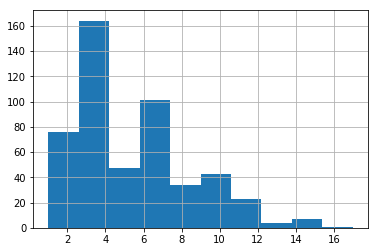

In [53]:
data[data.Liked==1].length.hist(bins=10)

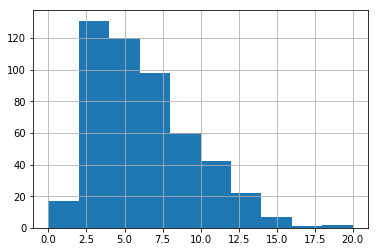

In [57]:
data[data.Liked==0].length.hist(bins=10)

In [54]:
data[data.Liked==1].length.agg(['min','max','mean'])

min      1.00
max     17.00
mean     5.41
Name: length, dtype: float64

In [55]:
data[data.Liked==0].length.agg(['min','max','mean'])

min      0.000
max     20.000
mean     5.792
Name: length, dtype: float64

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
cv = CountVectorizer()

In [39]:
t = data.iloc[:,0]

In [40]:
X = cv.fit_transform(t).toarray()

In [ ]:
#'wow' in cv.get_feature_names()

In [41]:
X.shape

(1000, 1891)

In [43]:
X.ndim

2

In [42]:
y = data.iloc[:,1].values

In [44]:
y.ndim

1

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,
                                                 random_state=0)

In [61]:
nb = MultinomialNB()
log = LogisticRegression()

In [62]:
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
log.score(X_test,y_test)

0.78

In [64]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [65]:
nb.score(X_test,y_test)

0.775

In [66]:
y_pred= nb.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [68]:
accuracy_score(y_test,y_pred)

0.775

In [69]:
confusion_matrix(y_test,y_pred)

array([[76, 21],
       [24, 79]], dtype=int64)